In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv('Lower_Extremity_Function__Mobility_.csv')
data

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NQMOB37,NQMOB30,NQMOB26,NQMOB32,NQMOB25,NQMOB33,NQMOB31,NQMOB28,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,723072701,S,4101,V13,NQOLLEFS,01/2019,4,4,4,4,2,4,4,4,01/2019,2020-06-29 14:26:27.0,NaN,01/2019
1,723251801,S,3522,V14,NQOLLEFS,01/2019,5,5,5,5,5,5,5,5,01/2019,2020-06-25 15:26:13.0,NaN,01/2019
2,723412901,S,3203,V15,NQOLLEFS,01/2019,5,4,5,5,5,5,5,5,01/2019,2020-06-26 19:14:44.0,NaN,01/2019
3,723823401,S,3479,V13,NQOLLEFS,01/2019,5,5,5,5,5,5,5,5,01/2019,2020-06-24 19:05:57.0,NaN,01/2019
4,765526501,S,3173,V15,NQOLLEFS,01/2020,5,5,4,5,4,5,3,5,01/2020,2020-06-30 09:46:22.0,NaN,01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,770246201,S,4033,V14,NQOLLEFS,02/2020,5,5,5,5,5,5,5,5,04/2020,2020-06-29 13:59:17.0,NaN,04/2020
428,770293601,S,4035,V14,NQOLLEFS,03/2020,5,5,5,5,5,5,5,5,04/2020,2020-06-29 14:02:47.0,NaN,04/2020
429,770345401,S,3013,V15,NQOLLEFS,12/2019,5,5,5,5,5,5,5,5,04/2020,2020-06-30 09:26:13.0,NaN,04/2020
430,770915501,S,3206,V16,NQOLLEFS,03/2020,5,5,5,5,5,5,5,5,04/2020,2020-06-26 19:15:09.0,NaN,04/2020


In [42]:
data.columns

Index(['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT',
       'NQMOB37', 'NQMOB30', 'NQMOB26', 'NQMOB32', 'NQMOB25', 'NQMOB33',
       'NQMOB31', 'NQMOB28', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY',
       'SITE_APRV'],
      dtype='object')

In [43]:
del data['REC_ID']
del data['F_STATUS']
del data['EVENT_ID']
del data['PAG_NAME']
del data['INFODT']
del data['ORIG_ENTRY']
del data['LAST_UPDATE']
del data['QUERY']
del data['SITE_APRV']
data

,PATNO,NQMOB37,NQMOB30,NQMOB26,NQMOB32,NQMOB25,NQMOB33,NQMOB31,NQMOB28
0,4101,4,4,4,4,2,4,4,4
1,3522,5,5,5,5,5,5,5,5
2,3203,5,4,5,5,5,5,5,5
3,3479,5,5,5,5,5,5,5,5
4,3173,5,5,4,5,4,5,3,5
...,...,...,...,...,...,...,...,...,...
427,4033,5,5,5,5,5,5,5,5
428,4035,5,5,5,5,5,5,5,5
429,3013,5,5,5,5,5,5,5,5
430,3206,5,5,5,5,5,5,5,5


In [44]:
data['PATNO'].value_counts()

3439    2
3955    2
3414    2
4020    2
3223    2
       ..
3752    1
3392    1
3758    1
4074    1
3584    1
Name: PATNO, Length: 364, dtype: int64

In [45]:
data.describe()

,PATNO,NQMOB37,NQMOB30,NQMOB26,NQMOB32,NQMOB25,NQMOB33,NQMOB31,NQMOB28
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,4573.013889,4.750000,4.745370,4.500000,4.620370,4.618056,4.578704,4.344907,4.560185
std,7669.936789,0.538538,0.540668,0.714451,0.707502,0.670871,0.913071,0.981982,0.944437
min,3000.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,3300.750000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000
50%,3526.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,3857.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,90456.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [46]:
mean_data = data.drop(['PATNO'],axis=1)
df1 = mean_data.mean(axis=1)
df1

0      3.750
1      5.000
2      4.875
3      5.000
4      4.500
       ...  
427    5.000
428    5.000
429    5.000
430    5.000
431    4.250
Length: 432, dtype: float64

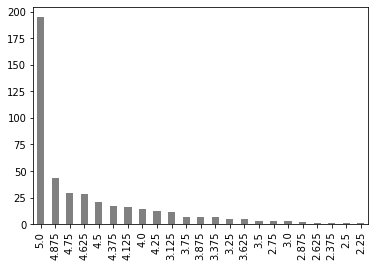

In [47]:
df1.value_counts().plot(kind='bar',color='gray')